# Music Discovery AI Agent
Allows you to interact with the last.fm database using natural language.

## Setup and installation


In [ ]:
# Standard library imports
import os
import sys

# IPython/Jupyter imports
from IPython.display import display, Image

# Install required packages for music discovery agent
required_packages = [
    "langgraph",
    "sentence-transformers",
    "scikit-learn",
    "numpy"
]

for package in required_packages:
    !pip install -q {package}

# Mount Google Drive
try:
    from google.colab import drive, userdata
    drive.mount('/content/drive', force_remount=False)  # Don't force remount
    print("Drive mounted successfully")
except Exception as e:
    print(f"Drive mount failed: {e}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 12.7 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully


## Configuration and project imports

In [ ]:
# Setup paths
DRIVE_PATH = "/content/drive/MyDrive/Colab-Notebooks/last-fm-data" # **REPLACE WITH YOUR ACTUAL PATH**
DB_PATH = os.path.join(DRIVE_PATH, "data", "lastfm_data.db")

# Add to Python path
sys.path.append(DRIVE_PATH)

# Validate database exists
assert os.path.exists(DB_PATH), f"Database not found: {DB_PATH}"

# Import project modules (after path is set)
from utils.music_discovery_helper import DatabaseManager, create_music_agent

print(f"Ready to go!")

Ready to go!


## Music discovery system
Used to explore last.fm database

In [ ]:
# Test database first
print("Testing database connection...")
db_manager = DatabaseManager(DB_PATH)
test_results = db_manager.execute_query("SELECT COUNT(*) as count FROM artists LIMIT 1")
if test_results:
    print(f"Database connected - Found {test_results[0]['count']} artists")
else:
    raise Exception("Database connection failed")

# Create agent
print("Creating Music Discovery Agent (loading AI models)...")
agent = create_music_agent(DB_PATH)
print("Music Discovery Agent Ready!")

Testing database connection...
Database connected - Found 659 artists
Creating Music Discovery Agent (loading AI models)...
Loading AI model for intent classification...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Computing semantic embeddings...
AI classifier ready! 🤖
Setting up fast entity extraction...
Fast entity extractor ready! ⚡
Music Discovery Agent Ready!


## Visualization

Agent Architecture Visualization


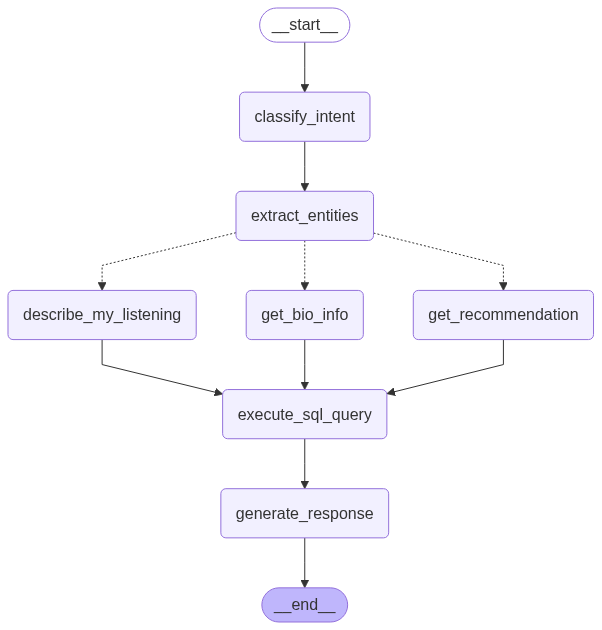

In [ ]:
print("Agent Architecture Visualization")
try:
    display(Image(agent.graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")

### Test

In [ ]:
def quick_test():
    """Test the music discovery agent across all intents"""
    tests = [
        # Artist info tests
        ("Tell me about Radiohead", "artist_info"),
        ("Who is Bob Dylan", "artist_info"),
        ("Information about The Beatles", "artist_info"),
        ("Tell me about ABBA", "artist_info"),
        ("Who is Nirvana", "artist_info"),
        ("Describe Pink Floyd", "artist_info"),

        # Music recommendation tests
        ("Find artists similar to Bob Hund", "recommend_music"),
        ("Artists like Radiohead", "recommend_music"),
        ("Music similar to The Beatles", "recommend_music"),
        ("Recommend bands like ABBA", "recommend_music"),
        ("Suggest artists like Bob Dylan", "recommend_music"),
        ("Find music like Pink Floyd", "recommend_music"),

        # Time periods test
        ("My top artists the last 7 days", "listening_stats"),
        ("Top tracks the past month", "listening_stats"),
        ("Show me albums 3month", "listening_stats"),
        ("My artists 6month", "listening_stats"),
        ("Top songs the past 12 months", "listening_stats"),
        ("My top artists overall", "listening_stats"),

        # Content types
        ("My top artists", "listening_stats"),
        ("Show me tracks", "listening_stats"),
        ("My albums", "listening_stats"),
    ]

    print("MUSIC DISCOVERY AGENT TEST RESULTS")
    print("=" * 70)
    print(f"{'Query':<40} | {'Intent Classification':<18} | {'Results'}")
    print("-" * 70)

    passed = failed = 0
    for query, expected_intent in tests:
        result = agent.process_query(query)
        actual_intent = result['intent']
        count = len(result['results'])
        status = "PASS" if actual_intent == expected_intent else "FAIL"

        if actual_intent == expected_intent:
            passed += 1
        else:
            failed += 1

        print(f"{query:<40} | {actual_intent:<18} | {count:>3} ({status})")

    print("-" * 70)
    print(f"SUMMARY: {passed} passed, {failed} failed")

# Run tests
quick_test()

# Database statistics
def show_database_stats():
    """Display database table counts"""
    tables = ['artists', 'tracks', 'albums', 'artist_similar']
    print(f"\nDATABASE STATISTICS: ", end="")
    for i, table in enumerate(tables):
        try:
            result = db_manager.execute_query(f"SELECT COUNT(*) as count FROM {table}")
            count = result[0]['count'] if result else 0
        except Exception:
            count = 0
        print(f"{table}: {count:,}", end=" | " if i < len(tables)-1 else "\n")

show_database_stats()

MUSIC DISCOVERY AGENT TEST RESULTS
Query                                    | Intent Classification | Results
----------------------------------------------------------------------
Tell me about Radiohead                  | artist_info        |   1 (PASS)
Who is Bob Dylan                         | artist_info        |   1 (PASS)
Information about The Beatles            | artist_info        |   1 (PASS)
Tell me about ABBA                       | artist_info        |   2 (PASS)
Who is Nirvana                           | artist_info        |   0 (PASS)
Describe Pink Floyd                      | artist_info        |   0 (PASS)
Find artists similar to Bob Hund         | recommend_music    |   3 (PASS)
Artists like Radiohead                   | recommend_music    |   0 (PASS)
Music similar to The Beatles             | recommend_music    |   0 (PASS)
Recommend bands like ABBA                | recommend_music    |   2 (PASS)
Suggest artists like Bob Dylan           | recommend_music    |   0 (

Nirvana, Pink Floyd: not in my database the for this time period.

Radiohead, Beatles, Pink Floyd, Bob Dylan: do not exist with similarity metrics in the database, hence 0.  

### Chat interface

In [ ]:
# CELL 7: INTERACTIVE CHAT INTERFACE
print("🎵 Interactive chat to explore your last.fm data")
print("="*50)
print("Ask me about artists, your listening stats, or get recommendations!")
print("="*50)

def chat():
    """Interactive chat interface for music discovery"""
    while True:
        try:
            user_input = input("\n🎵 You: ").strip()

            # Exit commands
            if user_input.lower() in ['quit', 'exit', 'bye', 'stop']:
                print("🎵 Thanks for chatting! Goodbye! 🎶")
                break

            # Help command
            if user_input.lower() in ['help', '?']:
                print("""🎵 I can help you with:
📊 YOUR STATS: 'my top artists 7day' • 'show me albums 1month' • 'my tracks overall'
🎤 ARTIST INFO: 'tell me about radiohead' • 'who is Bob Hund'
🎯 RECOMMENDATIONS: 'find artists like beatles' • 'recommend music'

📅 Times: 7day, 1month, 3month, 6month, overall • 🎼 Types: artists, songs, albums • ⌨️ 'quit' to exit""")
                continue

            # Process user query
            if user_input:
                result = agent.process_query(user_input)
                print(f"🎵 {result['response']}")
                print(f"    [Intent: {result['intent']}, Results: {len(result['results'])}]")
            else:
                print("🎵 Please ask me something! Type 'help' for examples.")

        except KeyboardInterrupt:
            print("\n🎵 Thanks for chatting! Goodbye! 🎶")
            break
        except Exception as e:
            print(f"🎵 Sorry, I encountered an error: {e}")

print("\nType 'help' for examples or 'quit' to exit.")
chat()

🎵 Interactive chat to explore your last.fm data
Ask me about artists, your listening stats, or get recommendations!

Type 'help' for examples or 'quit' to exit.

🎵 You: Tell me about boygenius
🎵 **boygenius**

Grammy-winning American singer-songwriters Julien Baker, Phoebe Bridgers and Lucy Dacus record together as boygenius.  Their first EP, the eponymous boygenius, was released in November 2018.  On July 3, 2020, a demo EP titled boygenius (demos) was released on Bandcamp and was available for 24 hours only.

Stats: 952K listeners • 81.4M plays
    [Intent: artist_info, Results: 1]

🎵 You: Who is Phoebe Bridgers
🎵 **Phoebe Bridgers**

Phoebe Lucille Bridgers (born August 17, 1994) is an American indie musician from Los Angeles, California.  Best known for her work as a solo singer-songwriter, she is also known for being part of the musical groups boygenius (with Julien Baker and Lucy Dacus) and Better Oblivion Community Center (with Conor Oberst).  Bridgers made her solo debut with t